In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy

In [3]:
from functools import partial

Uncertainty
========

Let's start by defining a FOPDT function as in the textbook

In [4]:
def G_P(k, theta, tau, s):
    """ Equation 7.19 """
    return k/(tau*s + 1)*numpy.exp(-theta*s)

Let's see what this looks like for particular values of $k$, $\tau$ and $\theta$

In [5]:
omega = numpy.logspace(-2, 2, 1000)
s = 1j*omega

In [6]:
Gnom = partial(G_P, 2.5, 2.5, 2.5)

In [7]:
def Gnom(s):
    return G_P(2.5, 2.5, 2.5, s)

In [8]:
Gfr = Gnom(s)

In [9]:
pomega = 0.5

In [10]:
def nominal_curve():
    plt.plot(Gfr.real, Gfr.imag)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

In [11]:
def nominal_point(pomega):
    Gnomp = Gnom(1j*pomega)
    plt.scatter(Gnomp.real, Gnomp.imag, s=100, color='magenta')

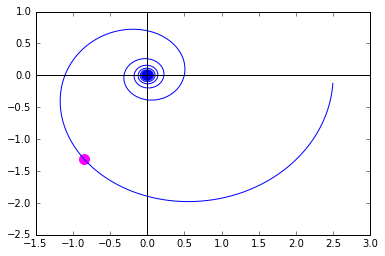

In [12]:
nominal_curve()
nominal_point(pomega)

At a particular frequency, let's look at a couple of possible plants

In [13]:
varrange = numpy.arange(2, 3, 0.1)
def cloudpoints(pomega):
    points = numpy.array([G_P(k, theta, tau, pomega*1j) 
                          for k in varrange 
                          for tau in varrange 
                          for theta in varrange])
    nominal_curve()
    nominal_point(pomega)
    plt.scatter(points.real, points.imag, color='red', alpha=0.1)

In [14]:
from IPython.html.widgets import interact
import IPython.html.widgets as widgets

/Users/alchemyst/anaconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<function __main__.cloudpoints>

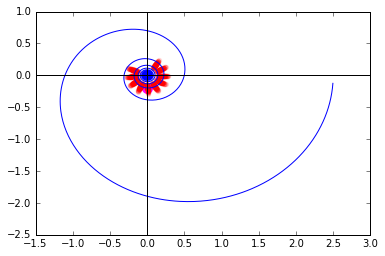

In [15]:
interact(cloudpoints, pomega=(0.1, 10))

Let's try to approximate this region by a disc

In [16]:
Gnomp = Gnom(1j*pomega)
points = numpy.array([G_P(k, theta, tau, pomega*1j) 
                      for k in varrange 
                      for tau in varrange 
                      for theta in varrange])

radius = max(abs(P - Gnomp) for P in points)
radius

0.80688459524668865

<function __main__.discapprox>

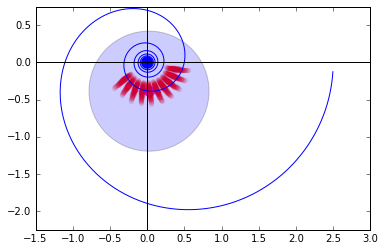

In [18]:
def discapprox(pomega, radius):
    Gnomp = Gnom(1j*pomega)
    c = plt.Circle((Gnomp.real, Gnomp.imag), radius, alpha=0.2)
    cloudpoints(pomega)
    plt.gca().add_artist(c)
    plt.axis('equal')
interact(discapprox, pomega=(0.1, 5), radius=radius)

The above represents an _additive_ uncertainty description, 

$$ G_p(s) = G(s) + w_A(s)\Delta_A(s); \quad |\Delta_A(j\omega) \leq 1 \forall \omega| $$

In [19]:
Npoints = 10000
Delta_As = (numpy.random.rand(Npoints)*2-1 + 
            (numpy.random.rand(Npoints)*2 - 1)*1j)
valid_values = numpy.abs(Delta_As) < 1
Delta_As = Delta_As[valid_values]

(-1.5, 1.5, -1.5, 1.5)

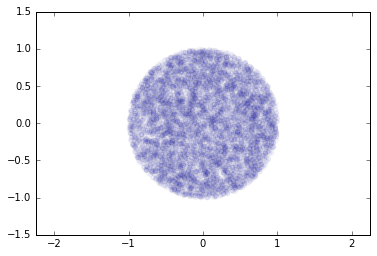

In [20]:
plt.scatter(Delta_As.real, Delta_As.imag, alpha=0.03)
plt.axis('equal')

We now build frequency response for $\Pi$ (all possible plants).

In [21]:
Pi = numpy.array([G_P(k, theta, tau, s) 
                  for k in varrange 
                  for tau in varrange 
                  for theta in varrange])

In [22]:
deviations = numpy.abs(Pi - Gfr)

(0.01, 1.0)

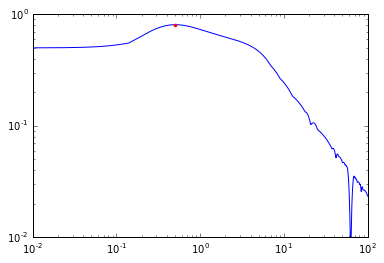

In [23]:
#plt.loglog(omega, numpy.abs(deviations.T), color='blue', alpha=0.2);
plt.loglog(omega, numpy.max(numpy.abs(deviations.T), axis=1))
plt.loglog(pomega, radius, 'r.')
plt.ylim(ymin=1e-2)

In [24]:
maxima = numpy.max(deviations, axis=0)
def plot_upper(K, tau, plotmax):
    w_A = K/(tau*s + 1)
    if plotmax:
        plt.loglog(omega, maxima, color='blue')
    else:
        plt.loglog(omega, numpy.abs(deviations.T), color='blue', alpha=0.1);
    plt.loglog(omega, numpy.abs(w_A), color='red')
    plt.ylim(ymin=1e-2)

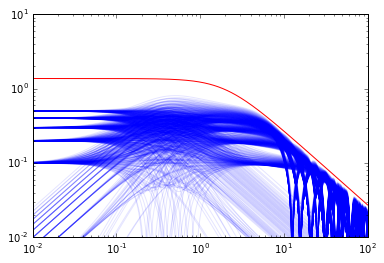

In [25]:
i = interact(plot_upper, K=(0.1, 2, 0.01), tau=(0.01, 1, 0.01), 
             plotmax=widgets.Checkbox())

In [26]:
def combined(pomega, K, tau, plotmax):
    f = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_upper(K, tau, plotmax)
    plt.axvline(pomega)
    plt.subplot(1, 2, 2)
    s = 1j*pomega
    radius = numpy.abs(K/(tau*s + 1))
    discapprox(pomega, radius)

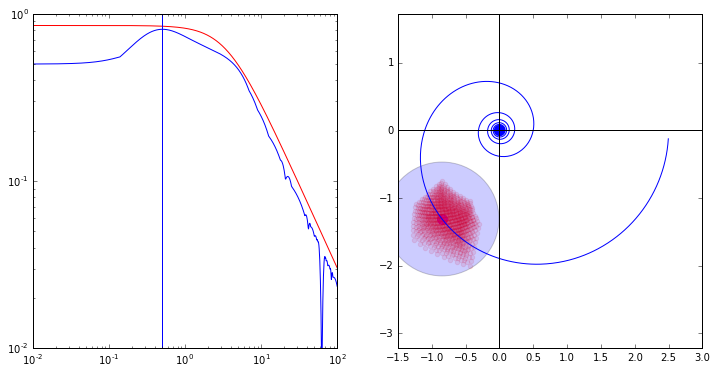

In [28]:
interact(combined, pomega=(0.1, 10), K=(0.1, 2, 0.01), tau=(0.01, 1, 0.01), 
         plotmax=widgets.Checkbox())